# Statistical and Machine Learning Models Exercises
----

There are multiple ways to complete these exercises.  A solution will be given, but other ways can work.

### Note

There are a few exercises here to get you started, but the best way to learn how to use these packages in Python is to take some analysis you've done in another program and try to replicate it in Python instead.  There is great variety in statistical and machine learning models.  Without teaching the theory behind the models too (which is out of the scope of this particular workshop), it's difficult to have exercises that are both interesting and accessible to a wide audience.  

## Imports

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/christina/anaconda/envs/p3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Exercise: Working with Distributions

Make a plot of the pdf of the Beta distribution with different parameter values like the one found on Wikipedia: https://en.wikipedia.org/wiki/Beta_distribution

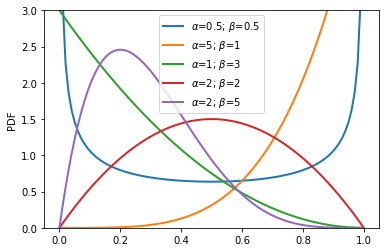

In [2]:
from scipy.stats import beta

x = np.linspace(0, 1, 100) 
fig, ax = plt.subplots()
for idx, params in enumerate([(.5,.5),(5,1),(1,3),(2,2),(2,5)]): #idx has iteration number, params has tuple from list
    ax.plot(x, beta.pdf(x, params[0], params[1]), c='C'+str(idx), lw=2, 
            label=r'$\alpha$='+str(params[0])+r'; $\beta$='+str(params[1]));
ax.set_ylabel("PDF")
ax.set_ylim(0,3)
ax.legend();

## Exercise: Difference in Means

Load in data on the average daily temperature in Chicago from http://academic.udayton.edu/kissock/http/Weather/gsod95-current/ILCHICAG.txt

Was the average temperature in Chicago this June significantly different from last June?

In [3]:
chitemp = pd.read_csv("http://academic.udayton.edu/kissock/http/Weather/gsod95-current/ILCHICAG.txt",
                   delim_whitespace=True, names=['month','day','year','temp'])
chitemp.head()

,month,day,year,temp
0,1,1,1995,23.7
1,1,2,1995,13.8
2,1,3,1995,14.1
3,1,4,1995,3.8
4,1,5,1995,5.0


In [4]:
stats.ttest_ind(chitemp.loc[(chitemp['month']==6) & (chitemp['year']==2017),'temp'],
               chitemp.loc[(chitemp['month']==6) & (chitemp['year']==2016),'temp'])

Ttest_indResult(statistic=0.22763453820110252, pvalue=0.82073091268508991)

There is a 0.22 degree difference in average temps, which is not statistically significant.

## Exercise: Correlation

Load weather data from Chicago and Detroit (you might have done Chicago above):

Chicago: http://academic.udayton.edu/kissock/http/Weather/gsod95-current/ILCHICAG.txt

Detroit: http://academic.udayton.edu/kissock/http/Weather/gsod95-current/MIDETROI.txt

During June 2017, were the temperatures in the two cities correlated with each other?  Plot them against each other as a visual check.

In [5]:
chitemp = pd.read_csv("http://academic.udayton.edu/kissock/http/Weather/gsod95-current/ILCHICAG.txt",
                   delim_whitespace=True, names=['month','day','year','temp'])
dettemp = pd.read_csv("http://academic.udayton.edu/kissock/http/Weather/gsod95-current/MIDETROI.txt",
                   delim_whitespace=True, names=['month','day','year','temp'])

In [6]:
stats.pearsonr(chitemp.loc[(chitemp['month']==6) & (chitemp['year']==2017),'temp'],
              dettemp.loc[(dettemp['month']==6) & (dettemp['year']==2017),'temp'])

(0.82470288546097925, 2.0948215560589905e-08)

Yes, the temperatures are correlated.

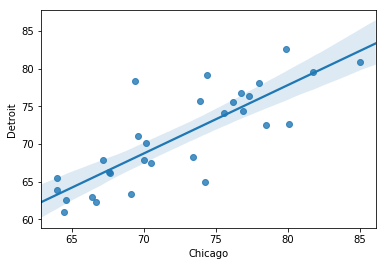

In [7]:
p = sns.regplot(chitemp.loc[(chitemp['month']==6) & (chitemp['year']==2017),'temp'],
              dettemp.loc[(dettemp['month']==6) & (dettemp['year']==2017),'temp']);
p.axes.set_xlabel("Chicago");
p.axes.set_ylabel("Detroit");

## Exercise: Logistic Regression

Implement [UCLA's IDRE](https://idre.ucla.edu/) logistic regression example written in R in Python instead: https://stats.idre.ucla.edu/r/dae/logit-regression/. 

The example is also available in several for statistical programs on [this page](https://stats.idre.ucla.edu/other/dae/) if they help you understand.  The example in R most closely mirrors a workflow in Python.  Note that in R, the logistic regression is run with the `glm` function if you're looking for where the model is actually run.

Implement the entire example with `statsmodels` (and pandas as appropriate).  Then use Scikit-learn to run the actual regression and get predicted values, but you don't need to do extra steps like getting the summary and confidence intervals, as there are not built-in methods for that.  Plot with `matplotlib`.

Note that neither package provides a way to get standard errors on predicted values, so you can ignore that particular step.

### statsmodel Implementation

**Solution**: The steps for the example are included below.  See http://blog.yhat.com/posts/logistic-regression-python-rodeo.html for the same exercise using statsmodels with more discussion of the steps (you can ignore the part about Rodeo there).

In [8]:
mydata = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
mydata.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [9]:
mydata.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [10]:
mydata.std()

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

In [11]:
pd.crosstab(mydata["admit"], mydata["rank"])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [12]:
mydata['rank'] = mydata['rank'].astype("object")

In [13]:
lg1 = smf.Logit.from_formula("admit ~ gre + gpa + rank", data = mydata).fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Aug 2017   Pseudo R-squ.:                 0.08292
Time:                        02:04:56   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
rank[T.2]     -0.6754      0.

In [14]:
lg1.conf_int()

,0,1
Intercept,-6.224242,-1.755716
rank[T.2],-1.295751,-0.055135
rank[T.3],-2.016992,-0.663416
rank[T.4],-2.370399,-0.732529
gre,0.000120,0.004409
gpa,0.153684,1.454391


In [15]:
R = np.eye(len(lg1.params))[1:4] ## define the 3 rank coefficients
lg1.wald_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test: statistic=[[ 20.89532374]], p-value=0.0001106792912747454>

In [16]:
lg1.wald_test(np.array([0,1,-1,0,0,0])) # rank 2 minus rank 3

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test: statistic=[[ 5.505293]], p-value=0.018959003622863537>

In [17]:
np.exp(lg1.params)

Intercept    0.018500
rank[T.2]    0.508931
rank[T.3]    0.261792
rank[T.4]    0.211938
gre          1.002267
gpa          2.234545
dtype: float64

In [18]:
params = lg1.params
conf = lg1.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

               2.5%     97.5%        OR
Intercept  0.001981  0.172783  0.018500
rank[T.2]  0.273692  0.946358  0.508931
rank[T.3]  0.133055  0.515089  0.261792
rank[T.4]  0.093443  0.480692  0.211938
gre        1.000120  1.004418  1.002267
gpa        1.166122  4.281877  2.234545


In [19]:
newdata1 = pd.DataFrame({'gre': mydata['gre'].mean(), 
                          'gpa': mydata['gpa'].mean(), 
                          'rank': range(1,5)})
newdata1['rank'] = newdata1['rank'].astype('object')
newdata1

,gpa,gre,rank
0,3.3899,587.7,1
1,3.3899,587.7,2
2,3.3899,587.7,3
3,3.3899,587.7,4


In [20]:
lg1.predict(newdata1)

0    0.516602
1    0.352285
2    0.218612
3    0.184668
dtype: float64

In [21]:
## do a few less points than in the UCLA example
gres = np.linspace(mydata['gre'].min(), mydata['gre'].max(), 20)
newdata2 = pd.DataFrame({'gpa':mydata['gpa'].mean(), 
                         'gre':np.repeat(gres, 4), 
                         'rank':[1,2,3,4]*len(gres)})
newdata2['rank'] = newdata2['rank'].astype('object')
newdata2['prediction'] = lg1.predict(newdata2)

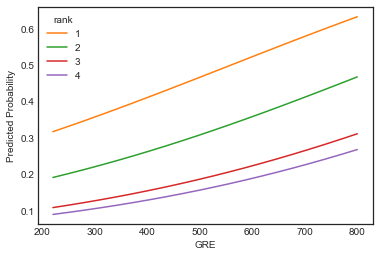

In [22]:
sns.set_style("white")
fig, ax = plt.subplots()
for key, grp in newdata2.groupby(['rank']):
    ax.plot(grp['gre'], grp['prediction'], c='C'+str(key))
lines, _ = ax.get_legend_handles_labels()
ax.set_xlabel("GRE")
ax.set_ylabel("Predicted Probability")
ax.legend(lines, [1,2,3,4], loc='best', title="rank");

In [23]:
[1,2,3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [24]:
lg1.llr_pvalue

7.5781942318150443e-08

In [25]:
lg1.llf

-229.25874623794948

### Scikit-learn Implementation

With Scikit-learn, we'll have to build the X matrix ourselves.

In [26]:
# we've already set rank column in mydata to be categorical above
X = pd.get_dummies(mydata)
X.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [27]:
X = X[['gre','gpa','rank_2','rank_3','rank_4']] # drop admit, rank_1
X['intercept'] = 1 # add intercept column

In [28]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()
logit.fit(X, mydata['admit'])
print(logit.coef_)

[[ 0.00190732  0.31410167 -0.65439995 -1.19919015 -1.41696886 -1.0695105 ]]


In [29]:
# predictions, again; make sure columns are in same order as X
gres = np.linspace(mydata['gre'].min(), mydata['gre'].max(), 20)
newdata2 = pd.DataFrame({'gre':np.repeat(gres, 4), 
                         'gpa':mydata['gpa'].mean(), 
                         'rank':[1,2,3,4]*len(gres)})
newdata2['rank'] = newdata2['rank'].astype('object')
newdata2 = pd.get_dummies(newdata2)
newdata2['intercept'] = 1
del newdata2['rank_1']
print(newdata2.head()) ## columns not in order: pandas bug

      gpa         gre  rank_2  rank_3  rank_4  intercept
0  3.3899  220.000000       0       0       0          1
1  3.3899  220.000000       1       0       0          1
2  3.3899  220.000000       0       1       0          1
3  3.3899  220.000000       0       0       1          1
4  3.3899  250.526316       0       0       0          1


In [30]:
newdata2 = newdata2[['gre','gpa','rank_2','rank_3','rank_4','intercept']]
newdata2["prediction"] = logit.predict_proba(newdata2)[:,1]
newdata2['rank'] = [1,2,3,4]*len(gres) # to use for plotting

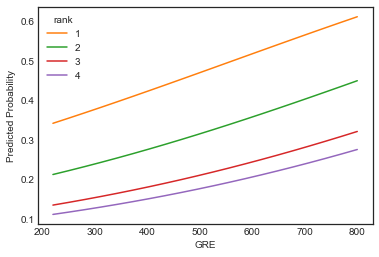

In [31]:
sns.set_style("white")
fig, ax = plt.subplots()
for key, grp in newdata2.groupby(['rank']):
    ax.plot(grp['gre'], grp['prediction'], c='C'+str(key))
lines, _ = ax.get_legend_handles_labels()
ax.set_xlabel("GRE")
ax.set_ylabel("Predicted Probability")
ax.legend(lines, [1,2,3,4], loc='best', title="rank");

## Exercise: Classification Models

Using the data provided in `mydata`, fit both SVM (`sklearn.svm.SVC`) and K nearest neighbors classifier models.  

For each method, make a plot showing which points were wrongly classified.

Make a plot showing which points are classified differently by the two methods.

In [4]:
np.random.seed(42)
nsamp = 60
A = np.random.multivariate_normal([1,1], np.array([[1,.1],[.1,1]]), nsamp)
B = np.random.multivariate_normal([4,1], np.array([[1,.1],[.1,1]]), nsamp)
C = np.random.multivariate_normal([2.5,4], np.array([[1,.1],[.1,1]]), nsamp)
pts = np.vstack([A,B,C])
mydata = pd.DataFrame({"x":pts[:,0], "y":pts[:,1], 
                       "group":['red']*nsamp+['blue']*nsamp+['green']*nsamp})

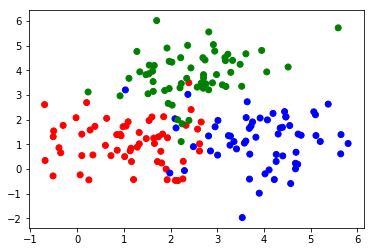

In [5]:
plt.scatter(mydata['x'], mydata['y'], c=mydata['group']);

In [6]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svm = SVC()
svm.fit(mydata[['x','y']], mydata['group'])
svm_predict = svm.predict(mydata[['x','y']])

knc = KNeighborsClassifier()
knc.fit(mydata[['x','y']], mydata['group'])
knc_predict = knc.predict(mydata[['x','y']])

In [7]:
mydata['svm'] = svm_predict
mydata['knc'] = knc_predict
mydata['difference'] = svm_predict!=knc_predict
sum(mydata.difference)

9

Errors for SVM; points in circles are errors, with the circle color showing the prediction

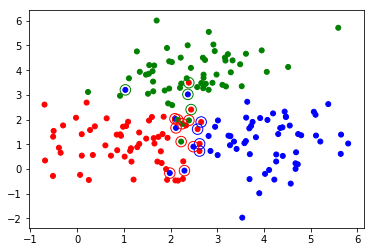

In [8]:
fig, ax = plt.subplots()
ax.scatter(mydata['x'], mydata['y'], c=mydata['group'], s=25)
ax.scatter(mydata.loc[mydata.svm!=mydata.group,'x'], 
           mydata.loc[mydata.svm!=mydata.group,'y'], 
           facecolors='none', 
           edgecolors=mydata.loc[mydata.svm!=mydata.group,'svm'],
          s=110);

Errors for K Nearest Neighbors; points in circles are errors, with the circle color showing the prediction

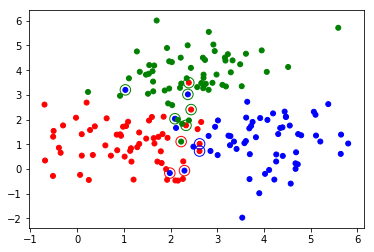

In [9]:
fig, ax = plt.subplots()
ax.scatter(mydata['x'], mydata['y'], c=mydata['group'], s=25)
ax.scatter(mydata.loc[mydata.knc!=mydata.group,'x'], 
           mydata.loc[mydata.knc!=mydata.group,'y'], 
           facecolors='none', 
           edgecolors=mydata.loc[mydata.knc!=mydata.group,'knc'],
          s=110);

Differences in classification between methods:

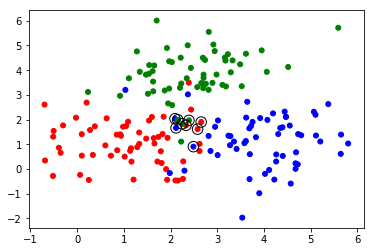

In [10]:
fig, ax = plt.subplots()
ax.scatter(mydata['x'], mydata['y'], c=mydata['group'], s=25)
ax.scatter(mydata.loc[mydata.difference,'x'], 
           mydata.loc[mydata.difference,'y'], 
           facecolors='none', edgecolors='black',
          s=110);

## Exercise: Exploring Classification Model Parameters

Using the supplied data, explore how well the model fits as a function of the number of neighbors used for the classification, from 1 to 10.  Use 10 fold cross-validation to assess the accuracy at each number of neighbors.  Plot the results, showing mean accuracy with confidence intervals.

Does the number of neighbors matter?  How sure are you?

Hint: You can write a loop to do this, or you can use `GridSearchCV`.

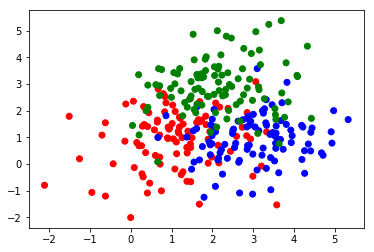

In [11]:
np.random.seed(50)
nsamp = 100
A = np.random.multivariate_normal([1,1], np.array([[1,.1],[.1,1]]), nsamp)
B = np.random.multivariate_normal([3,1], np.array([[1,.1],[.1,1]]), nsamp)
C = np.random.multivariate_normal([2,3], np.array([[1,.1],[.1,1]]), nsamp)
pts = np.vstack([A,B,C])
mydata = pd.DataFrame({"x":pts[:,0], "y":pts[:,1], 
                       "group":['red']*nsamp+['blue']*nsamp+['green']*nsamp})
plt.scatter(mydata['x'], mydata['y'], c=mydata['group']);

### Loop Implementation

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

results = pd.DataFrame({'neighbors':[x for x in range(1,11)],
                       'mean':0,
                       'sd':0})

for i in range(1,11):
    knc = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knc, 
                             mydata[['x','y']],
                             mydata['group'], 
                             cv=10) 
    results.loc[i-1,"mean"] = scores.mean()
    results.loc[i-1, "sd"] = scores.std()

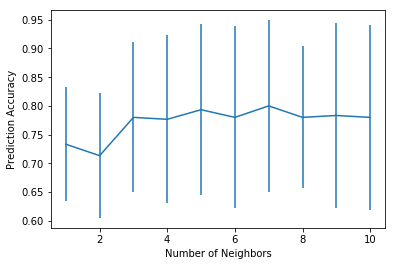

In [13]:
fig, ax = plt.subplots()
ax.errorbar([x for x in range(1,11)], results["mean"],
            2*results["sd"]);
ax.set_ylabel("Prediction Accuracy")
ax.set_xlabel("Number of Neighbors");

### Grid Search Implementation

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neighbors=[x for x in range(1,11)] # list 1...10
grid = GridSearchCV(estimator=KNeighborsClassifier(), 
                    param_grid=dict(n_neighbors=neighbors), # param to search over
                    cv=10) # cross-validation
grid.fit(mydata[['x','y']], mydata['group'])

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Print some information about the search:

In [15]:
print(grid.best_score_) # best mean
print(grid.best_estimator_.n_neighbors)

0.8
7


Get values for plotting

In [16]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

# print to take a look
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

0.733 (+/-0.099) for {'n_neighbors': 1}
0.713 (+/-0.108) for {'n_neighbors': 2}
0.780 (+/-0.131) for {'n_neighbors': 3}
0.777 (+/-0.146) for {'n_neighbors': 4}
0.793 (+/-0.148) for {'n_neighbors': 5}
0.780 (+/-0.158) for {'n_neighbors': 6}
0.800 (+/-0.149) for {'n_neighbors': 7}
0.780 (+/-0.124) for {'n_neighbors': 8}
0.783 (+/-0.161) for {'n_neighbors': 9}
0.780 (+/-0.161) for {'n_neighbors': 10}


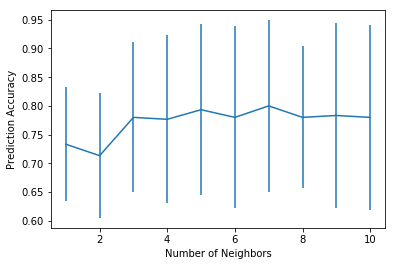

In [17]:
fig, ax = plt.subplots()
ax.errorbar([x for x in range(1,11)], means,
            2*stds);
ax.set_ylabel("Prediction Accuracy")
ax.set_xlabel("Number of Neighbors");

## Exercise: Predicting Material Properties

In this exercise, you will build and evaluate a linear model to predict a material property, namely band gap. 

Electronic band gap is a materials property which can be described as the energy difference between top of the electronic valence and bottom of the conduction bands. Consequently, band gap primarily affects electrical conductivity and optical properties of materials. A general rule: As the band gap increases, electronic conductivity decreases. 

In this exercise you will train a linear model to predict electronic band gap of materials. The training set for this task contains the band gaps of 4096 binary compounds (AxBy), e.g. $H_2 O$.

This example is adapted from [Citrine.io](https://citrine.io/2015/03/17/machine-learning-for-the-materials-scientist-feature-engineering-model-building/).

Some set-up code is provided. `bandgapDFT.csv` is in the repository (download it first if you haven't already).

In [20]:
from numpy import mean
from sklearn import linear_model, metrics, ensemble
from sklearn.model_selection import cross_val_score
import json

trainFile = open("bandgapDFT.csv","r").readlines()

# Initialize dictionary and list variables for the rest of the example
atomicnumbers = dict()
bandgaps = []
features = []

for line in trainFile:
    split = str.split(line, ',')
    bandgaps.append(float(split[1])) #store numerical values of band gaps

The `feature_vectors.txt` (in the repository) contains the vectorized composition of the all the compounds whose band gaps are given in `bandgapDFT.csv`. For instace, let's define $BeH_2$ as a linear combination of compositions of the first 100 elements in the periodic table:


$BeH_2$ = (0.66666 H + 0.0 He + 0.0 Li + 0.33333 Be + 0.0 B + 0.0 C + 0.0 N + 0.0 O + 0.0 F + ... )

The corresponding list for the given linear combination is shown below:

[0.6666666666666666, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

where each number corresponds to the abundance of each element respectively in the list below 

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm']

In [26]:
with open("feature_vectors.txt","r") as fp: 
    features=json.load(fp)

# atomic_numbers.txt"contains the names and atomic  
# numbers of the first 100 elements in the periodic table
with open("atomic_numbers.txt","r") as fp:
    atomicnumbers=json.load(fp)
    
co2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333333, 0.0, 0.66666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
alna = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

We now have a (naive) way of converting each material in our training set into a vector for our machine learning model to crunch, and equivalently we can express any new chemical formula with this representation for the purposes of making predictions. Time for the fun part!

From this point forward, we have everything we need to train and evaluate a regression model for material band gaps.

1) First determine a baseline accuracy by calculating the mean absolute error of band gaps. This is the error corresponding to always guessing the average of the band gaps for a material. A good model should have a lower error than this.

2) Use a linear ridge regression model to model band gaps using our feature set (i.e. the composition vector):

* Set the alpha parameter of the ridge regression model (a paramater to control size of the fitted coefficients) equal to 0.5

* Define `ShuffleSplit` cross validation scheme for the band gaps. Use 10-fold cross validation with 0.1 test fraction.

* Evaluate the cross validation score for your modes with the "mean absolute error" scoring scheme.

* Look at the model coefficients to see if they make sense with what we know about the elements (use the `atomicnumbers` dict to help with labels and matching values).

3) Finally use a Random Forest Regression model and calculate the mean absolute error score for this model. Use 10 trees in the forest.

* Using the Random Forest model, predict the band gap for $CO_2$ (expect a high value, non-conductive gas) and AlNa (expect a low value, conductive metal).  There are variables defined for these above.

**Solution**

In [22]:
baselineError = mean(abs(mean(bandgaps) - bandgaps))
print("The mean absolute error (MAE) of always guessing the average band gap is: " + 
      str(round(baselineError, 3)) + " eV")

The mean absolute error (MAE) of always guessing the average band gap is: 0.728 eV


In [23]:
linear = linear_model.Ridge(alpha = 0.5)
cv = cross_validation.ShuffleSplit(len(bandgaps), n_iter=10, test_size=0.1, 
                                   random_state=0) ## setting random state just to keep consistent
scores = cross_val_score(linear, features, bandgaps, cv=cv, scoring='neg_mean_absolute_error')
print("The MAE of the linear ridge regression band gap model using the naive feature set is: " +
      str(round(abs(mean(scores)), 3)) + " eV")

The MAE of the linear ridge regression band gap model using the naive feature set is: 0.47 eV


Doing better than the baseline, so that's a step in the right direction.

See if model coefficients make sense, since we (or at least the chemists among us) know something about different elements.

In [24]:
linear.fit(features, bandgaps) # fit to the whole data set; we're not doing CV here
print("element: coefficient")
for i in atomicnumbers.keys(): # coefficient labels
       print(i + ': ' + str(linear.coef_[atomicnumbers[i]-1]))

element: coefficient
H: 1.87000918111
He: 0.0
Li: 0.471679018799
Be: 0.243871876828
B: 0.22915696116
C: 0.35449422283
N: 1.69078868432
O: 2.28865291048
F: 3.95035733949
Ne: 0.0
Na: 0.794273044946
Mg: 0.0239525184542
Al: -0.00267048056217
Si: 0.282300385515
P: 0.618296089354
S: 1.24048466049
Cl: 2.81918301294
Ar: 0.0
K: 1.09749347606
Ca: 0.12033468392
Sc: -0.409236168468
Ti: -0.675957059589
V: -0.704965141051
Cr: -0.771816472891
Mn: -0.514374807699
Fe: -0.431688681554
Co: -0.374220544877
Ni: -0.289724992866
Cu: -0.386990847414
Zn: -0.134767025101
Ga: -0.0725382805727
Ge: -0.00513072046577
As: 0.349421293638
Se: 0.643767050081
Br: 2.38142382545
Kr: -0.0871269683031
Rb: 0.787731518215
Sr: 0.155215849743
Y: -0.265178169559
Zr: -0.53793665989
Nb: -0.933515300424
Mo: -0.650034466386
Tc: -0.482894971266
Ru: -0.310915841206
Rh: -0.318854065436
Pd: -0.310607753782
Ag: -0.514168117419
Cd: -0.213668180038
In: -0.190448308408
Sn: -0.176635763929
Sb: -0.0899143360915
Te: 0.238347839337
I: 2.0080906

Examining these coefficients reveals a more or less expected result: electronegative elements such as O, Cl, and F tend to strongly increase a compound's band gap, whereas metallic elements such as V and Cr are generally associated with smaller band gaps.

In [25]:
rfr = ensemble.RandomForestRegressor(n_estimators=10) #try 10 trees in the forest
scores_rfr = cross_validation.cross_val_score(rfr, features, bandgaps, cv=cv, scoring='neg_mean_absolute_error')
print("The MAE of the random forest regressor band gap model using the feature set is: "+ 
      str(round(abs(mean(scores_rfr)), 3)) + " eV")

The MAE of the random forest regressor band gap model using the feature set is: 0.37 eV


This is lower error than we had above.

In [37]:
rfr.fit(features, bandgaps)
rfr.predict(np.array(co2).reshape(1,-1))

array([ 4.64325185])

Is this value high or low?  Let's look at the distribution of predicted values for the data we trained the model with.

In [43]:
from scipy.stats import describe
describe(rfr.predict(features))

DescribeResult(nobs=4096, minmax=(0.0, 8.1393600000000017), mean=0.43051529528852384, variance=0.94242231572283686, skewness=3.0470947299193014, kurtosis=10.432906577433693)

In [38]:
rfr.predict(np.array(alna).reshape(1,-1))

array([ 0.])